# ทำความเข้าใจข้อมูลฝนเรดาร์รายชั่วโมง

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read and cleansing data

In [2]:
df = pd.read_csv('./00Results/00rain_radar_hourly_extracted_all_events_mean_dBZ/df_org_dbz_rain_test120km.csv')
df.drop(df[df['rain_x'] <= 0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['rain_x'] < 1.0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['cappi1km'] < 10].index, inplace = True) #ฝนอ่่อนมากๆ < 10 dBZ
#df.drop(df[df['cappi4km'] > 55].index, inplace = True) #ค่าการสะท้อนที่อาจเป็นลูกเห็บ 55 dBZ มุมยกด้านบนสุด
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
#df.reset_index(drop=True)
#df.dropna(inplace=True)

In [3]:
df.rename(columns={"cappi1km": "dBZ_c1", "cappi2km": "dBZ_c2","cappi3km": "dBZ_c3","cappi4km": "dBZ_c4"}, inplace=True)
df.rename(columns={"rain_x":"rain_truth"}, inplace=True)
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,full_date,code,rain_truth
6,NaN,NaN,NaN,NaN,2018-06-01-00:00,CTKN,10.8
28,NaN,NaN,NaN,NaN,2018-06-01-00:00,NMPR,3.6
72,22.267728,22.656334,23.252944,23.492632,2018-06-01-01:00,CMSG,0.4
107,37.450751,35.934908,34.647741,31.643592,2018-06-01-01:00,PIN004,0.2
138,28.847841,28.025389,26.520176,24.078056,2018-06-01-02:00,CMSG,0.2
...,...,...,...,...,...,...,...
68305,NaN,NaN,NaN,NaN,2018-09-21-18:00,CNDN,0.4
68328,NaN,NaN,NaN,NaN,2018-09-21-18:00,NAN005,1.0
68334,18.423027,18.423027,18.423027,NaN,2018-09-21-18:00,NGBA,0.8
68411,29.833809,NaN,NaN,NaN,2018-09-21-19:00,NAN013,24.8


### คำนวณฝนประมาณค่าจากเรดาร์ค่าด้วย ZR Vectorized Operations:

In [4]:
#  Vectorized Operations:
constants = {
    'MP': (200, 1.6), # ZR marshall/palmer
    'RF': (250, 1.2), # ZR Rosenfeld
    'SC': (300, 1.4) # ZR Summer Deep Convection
}

for prefix, (a, b) in constants.items():
    for suffix in ['c1', 'c2', 'c3', 'c4']:
        dBZ_column = f'dBZ_{suffix}'
        rr_column = f'rr_{prefix}_{suffix}'
        df[rr_column] = ((10**(df[dBZ_column]/10.))/a)**(1/b)

In [5]:
#### ดรอปคอมลัมน์ cappi ทิ้ง
df.drop(columns=['dBZ_c1','dBZ_c2','dBZ_c3','dBZ_c4'], inplace=True) #ลบคอลัน์
df

,full_date,code,rain_truth,rr_MP_c1,rr_MP_c2,rr_MP_c3,rr_MP_c4,rr_RF_c1,rr_RF_c2,rr_RF_c3,rr_RF_c4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4
6,2018-06-01-00:00,CTKN,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2018-06-01-00:00,NMPR,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2018-06-01-01:00,CMSG,0.4,0.898647,0.950336,1.035536,1.071879,0.720047,0.775791,0.869885,0.910827,0.662491,0.706216,0.779027,0.810350
107,2018-06-01-01:00,PIN004,0.2,7.989658,6.423741,5.337527,3.464023,13.262108,9.914991,7.745125,4.351938,8.047877,6.272011,5.075354,3.096594
138,2018-06-01-02:00,CMSG,0.2,2.316575,2.057989,1.657171,1.166097,2.545092,2.173530,1.628288,1.019111,1.955185,1.707816,1.333294,0.892255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68305,2018-09-21-18:00,CNDN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68328,2018-09-21-18:00,NAN005,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68334,2018-09-21-18:00,NGBA,0.8,0.516768,0.516768,0.516768,NaN,0.344325,0.344325,0.344325,NaN,0.352013,0.352013,0.352013,NaN
68411,2018-09-21-19:00,NAN013,24.8,2.669742,NaN,NaN,NaN,3.075158,NaN,NaN,NaN,2.299397,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df

,full_date,code,rain_truth,rr_MP_c1,rr_MP_c2,rr_MP_c3,rr_MP_c4,rr_RF_c1,rr_RF_c2,rr_RF_c3,rr_RF_c4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4
0,2018-06-01-01:00,CMSG,0.4,0.898647,0.950336,1.035536,1.071879,0.720047,0.775791,0.869885,0.910827,0.662491,0.706216,0.779027,0.810350
1,2018-06-01-01:00,PIN004,0.2,7.989658,6.423741,5.337527,3.464023,13.262108,9.914991,7.745125,4.351938,8.047877,6.272011,5.075354,3.096594
2,2018-06-01-02:00,CMSG,0.2,2.316575,2.057989,1.657171,1.166097,2.545092,2.173530,1.628288,1.019111,1.955185,1.707816,1.333294,0.892255
3,2018-06-01-02:00,NSRS,2.8,26.740589,25.118143,21.500539,16.534742,66.395140,61.078967,49.641029,34.976114,32.009071,29.799314,24.947083,18.478841
4,2018-06-01-03:00,CMSG,0.2,5.971266,4.801238,4.734323,5.353180,8.994911,6.725314,6.600631,7.775424,5.769704,4.496865,4.425311,5.092368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,2018-09-20-16:00,TGSK,0.8,0.871279,1.291773,1.794893,1.963920,0.690957,1.168127,1.811173,2.042083,0.639483,1.002976,1.460664,1.618897
2602,2018-09-20-17:00,PAS003,2.6,7.637749,6.846747,5.652252,4.423040,12.489034,10.794950,8.359949,6.028410,7.644055,6.746207,5.418789,4.094371
2603,2018-09-20-17:00,TGSK,0.2,0.816687,1.046085,1.194923,1.347858,0.633844,0.881721,1.052838,1.236234,0.593899,0.788103,0.917506,1.052896
2604,2018-09-21-14:00,PIN003,2.4,3.570917,3.593265,3.415970,2.660618,4.531911,4.569766,4.271631,3.061153,3.206039,3.228980,3.047550,2.290418


## Feature analysis

###  Correlation matrix analysis:

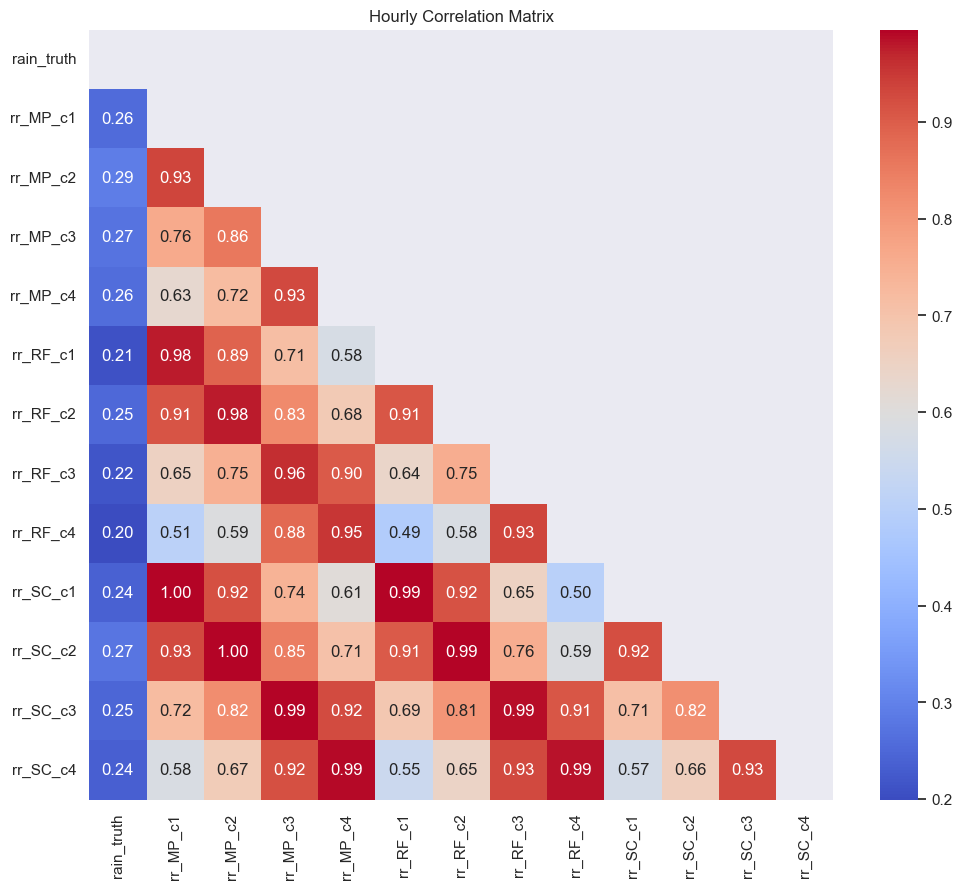

important_features_corr: ['rain_truth', 'rr_MP_c2', 'rr_SC_c2', 'rr_MP_c3', 'rr_MP_c4', 'rr_MP_c1', 'rr_RF_c2', 'rr_SC_c3', 'rr_SC_c1', 'rr_SC_c4', 'rr_RF_c3', 'rr_RF_c1']


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create a mask for the lower triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the font scale for the heatmap
sns.set(font_scale=1.0)  # Adjust the font scale as needed

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title("Hourly Correlation Matrix")
plt.show()

# Identify features highly correlated with the target
correlation_with_target = correlation_matrix['rain_truth'].abs().sort_values(ascending=False)
important_features_corr = correlation_with_target[correlation_with_target > 0.20].index.tolist()
print('important_features_corr:', important_features_corr)


## Density scatter plot

In [9]:
def density_plot(rain_truth, rain_radar, max_=15):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from scipy.stats import linregress
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    

    font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)

    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # data
    x = rain_radar
    y = rain_truth

    # Calculate the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # Set the desired colorbar range
    cbar_min = 0.01  # specify your minimum value
    cbar_max = 0.08 # specify your maximum value

    # Create scatter plot with density color map
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=z, s=40, cmap='rainbow', alpha=0.6, vmin=cbar_min, vmax=cbar_max)

    # Set x and y axis limits
    plt.xlim(0, max_)
    plt.ylim(0, max_)

    # Plot the 1:1 line
    plt.plot([0, max_], [0, max_], linestyle='--', color='grey', linewidth=2)

    # Set font size for axis labels and title
    plt.xlabel('radar rainfall [mm/hr]')
    plt.ylabel('gauge rainfall [mm/hr]')
    plt.title('Comparison hourly radar and gauge rainfall', fontsize=16)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Density', fontsize=14)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(x, y))
    mse = mean_squared_error(x, y)
    mae = mean_absolute_error(x, y)
    r2 = r2_score(x, y)

    # Calculate p-value and correlation coefficient (r)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Plot the regression line
    #plt.plot(x, slope * x + intercept, linestyle='-', color='magenta', linewidth=2,
    #         label=f'Regression Line (r={r_value:.2f}, p={p_value:.4f})')
    
    # Set font size for legend
    plt.legend(fontsize=12)

    # Display the plot
    plt.show()
    
    print(slope, intercept)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


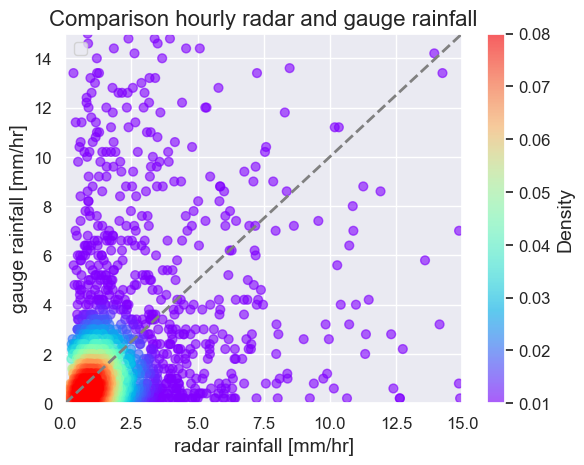

0.4324257989268337 1.4165453010478133


In [10]:
density_plot(df['rain_truth'],df['rr_MP_c2'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


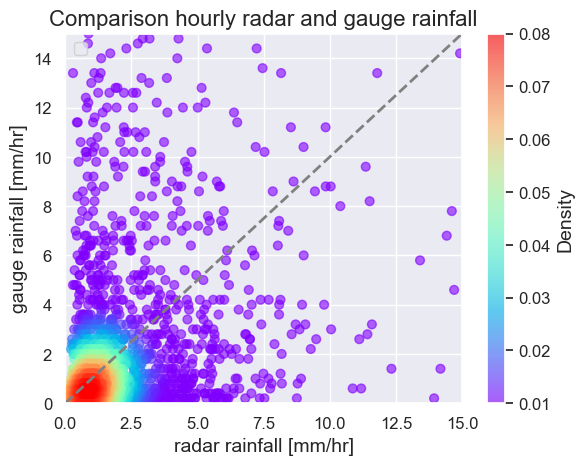

0.37480318828580034 1.4997732853968178


In [11]:
density_plot(df['rain_truth'],df['rr_MP_c3'])

## คำนวณค่าสถิติโดยรวมระหว่างเรดาร์กับฝนสถานีในแต่ละตัวแปรแล้วเก็บไว้ใน dataframe

In [12]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress

def cal_metrics(x, y):    
    rmse = np.sqrt(mean_squared_error(x, y))
    mse = mean_squared_error(x, y)
    mae = mean_absolute_error(x, y)
    r2 = r2_score(x, y)
    mfb = x.sum(axis=0) / y.sum(axis=0)
    
    # Calculate p-value and correlation coefficient (r)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    return {
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r2,
        "MFB": mfb,
        "Correlation coefficient (r)": r_value,
        "P-value": p_value
    }

# Filter columns with prefix 'rr_'
rr_columns = df.filter(like='rr_')

# Calculate metrics for each column
metrics_results = {}
for column in rr_columns.columns:
    metrics_results[column] = cal_metrics(rr_columns[column], df['rain_truth'])

# Create DataFrame from the results
metrics_df = pd.DataFrame(metrics_results).T

# Display the DataFrame
print(metrics_df)


              RMSE        MSE       MAE  R-squared       MFB  \
rr_MP_c1  4.993654  24.936578  2.197827  -1.124820  0.865967   
rr_MP_c2  4.761778  22.674526  2.144251  -1.344325  0.864055   
rr_MP_c3  4.914758  24.154846  2.183665  -1.137532  0.898707   
rr_MP_c4  4.835257  23.379715  2.193144  -1.472557  0.885683   
rr_RF_c1  8.711046  75.882327  2.913728  -0.072918  1.222272   
rr_RF_c2  7.586517  57.555234  2.756588  -0.085270  1.181694   
rr_RF_c3  8.985941  80.747143  2.856942  -0.054404  1.247630   
rr_RF_c4  8.451016  71.419665  2.777128  -0.102735  1.190530   
rr_SC_c1  5.387210  29.022026  2.211394  -0.767276  0.796648   
rr_SC_c2  5.036904  25.370400  2.143521  -0.952474  0.786150   
rr_SC_c3  5.341161  28.527998  2.180536  -0.740229  0.822347   
rr_SC_c4  5.203804  27.079574  2.168445  -0.985327  0.800961   

          Correlation coefficient (r)       P-value  
rr_MP_c1                     0.258347  5.263034e-41  
rr_MP_c2                     0.291581  3.060462e-52  
rr_MP

In [13]:
# Define formatters for each column
formatters = {
    "RMSE": "{:.3f}",
    "MSE": "{:.3f}",
    "MAE": "{:.3f}",
    "R-squared": "{:.3f}",
    "MFB": "{:.3f}",
    "Correlation coefficient (r)": "{:.3f}",
    "P-value": "{:.3f}"
}

# Apply formatting to the DataFrame
styled_df = metrics_df.style.format(formatters)

# Display the styled DataFrame
styled_df


,RMSE,MSE,MAE,R-squared,MFB,Correlation coefficient (r),P-value
rr_MP_c1,4.994,24.937,2.198,-1.125,0.866,0.258,0.000
rr_MP_c2,4.762,22.675,2.144,-1.344,0.864,0.292,0.000
rr_MP_c3,4.915,24.155,2.184,-1.138,0.899,0.273,0.000
rr_MP_c4,4.835,23.380,2.193,-1.473,0.886,0.261,0.000
rr_RF_c1,8.711,75.882,2.914,-0.073,1.222,0.211,0.000
rr_RF_c2,7.587,57.555,2.757,-0.085,1.182,0.252,0.000
rr_RF_c3,8.986,80.747,2.857,-0.054,1.248,0.216,0.000
rr_RF_c4,8.451,71.420,2.777,-0.103,1.191,0.199,0.000
rr_SC_c1,5.387,29.022,2.211,-0.767,0.797,0.238,0.000
rr_SC_c2,5.037,25.370,2.144,-0.952,0.786,0.275,0.000


## คำนวณ bias สำหรับค่า rr กับ rg ในแต่ละคู่รายชั่วโมง

In [14]:
# Filter columns with prefix 'rr_'
rr_columns = df.filter(like='rr_')

# Calculate bias for each column
bias_results = {}
for column in rr_columns.columns:
    bias_results[f"{column}_bias"] = (df[column] - df['rain_truth']).abs() # ทดลองใช้ค่า absolute

# Create DataFrame from the bias results
bias_df = pd.DataFrame(bias_results)

# Display the DataFrame
print(bias_df)

      rr_MP_c1_bias  rr_MP_c2_bias  rr_MP_c3_bias  rr_MP_c4_bias  \
0          0.498647       0.550336       0.635536       0.671879   
1          7.789658       6.223741       5.137527       3.264023   
2          2.116575       1.857989       1.457171       0.966097   
3         23.940589      22.318143      18.700539      13.734742   
4          5.771266       4.601238       4.534323       5.153180   
...             ...            ...            ...            ...   
2601       0.071279       0.491773       0.994893       1.163920   
2602       5.037749       4.246747       3.052252       1.823040   
2603       0.616687       0.846085       0.994923       1.147858   
2604       1.170917       1.193265       1.015970       0.260618   
2605       1.057301       1.074637       1.005704       0.854208   

      rr_RF_c1_bias  rr_RF_c2_bias  rr_RF_c3_bias  rr_RF_c4_bias  \
0          0.320047       0.375791       0.469885       0.510827   
1         13.062108       9.714991       7.5451

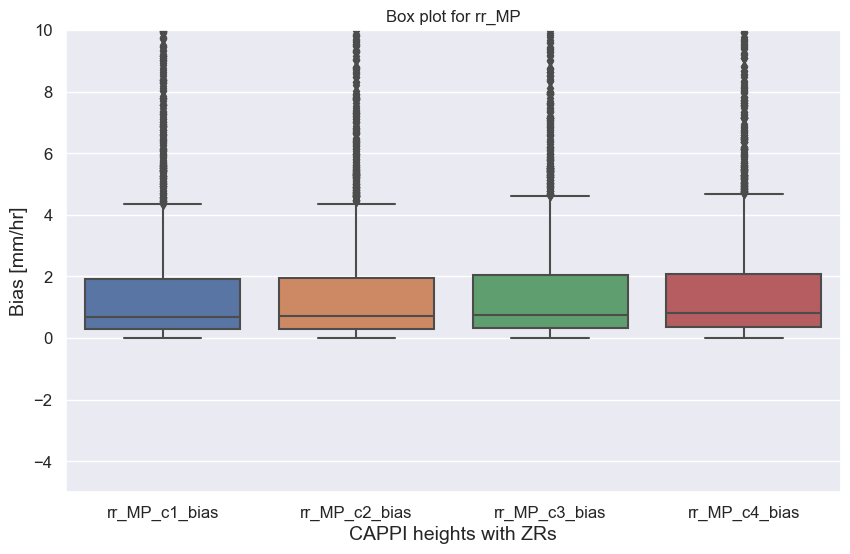

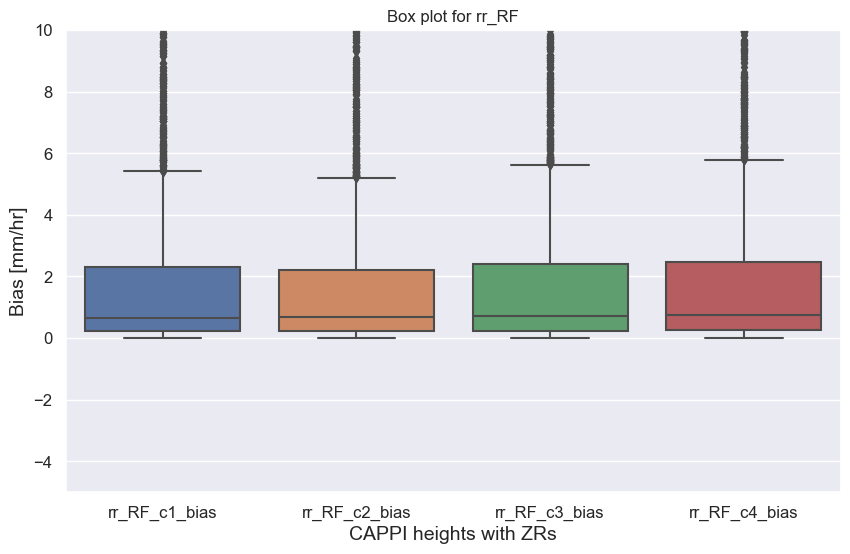

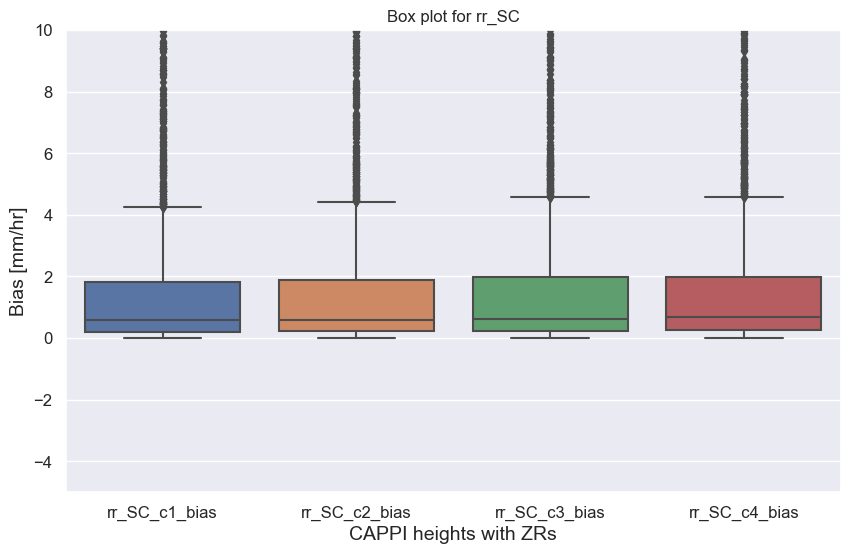

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the columns by their prefixes
groups = {'rr_MP': ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
          'rr_RF': ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
          'rr_SC': ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']}

# Plot box plots for each group
for group, columns in groups.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=bias_df[columns], orient='v')
    plt.title(f'Box plot for {group}')
    plt.xlabel('CAPPI heights with ZRs')
    plt.ylabel('Bias [mm/hr]')
    plt.ylim(-5, 10)  # Set y-axis limits
    plt.show()


ดูไม่รู้เรื่อง ต้องหา bias ในแต่ละชั่วโมงนั้น ๆ ด้วยการใช้ hourly mean bias แล้วนำมาหา boxplot

In [16]:
## เพิ่ม full_date, code
## find mean biass which is called hourly mean bias by using same full_date
## plot boxplot by zrs


# Merge bias_df with df on index
bias_df_with_date = bias_df.merge(df[['full_date']], left_index=True, right_index=True)

# Display the result
print(bias_df_with_date)

      rr_MP_c1_bias  rr_MP_c2_bias  rr_MP_c3_bias  rr_MP_c4_bias  \
0          0.498647       0.550336       0.635536       0.671879   
1          7.789658       6.223741       5.137527       3.264023   
2          2.116575       1.857989       1.457171       0.966097   
3         23.940589      22.318143      18.700539      13.734742   
4          5.771266       4.601238       4.534323       5.153180   
...             ...            ...            ...            ...   
2601       0.071279       0.491773       0.994893       1.163920   
2602       5.037749       4.246747       3.052252       1.823040   
2603       0.616687       0.846085       0.994923       1.147858   
2604       1.170917       1.193265       1.015970       0.260618   
2605       1.057301       1.074637       1.005704       0.854208   

      rr_RF_c1_bias  rr_RF_c2_bias  rr_RF_c3_bias  rr_RF_c4_bias  \
0          0.320047       0.375791       0.469885       0.510827   
1         13.062108       9.714991       7.5451

In [17]:
# Calculate the mean of bias_df_with_date for each unique date and hour
mean_bias_df = bias_df_with_date.groupby('full_date').mean()

# Display the mean_bias_df
print(mean_bias_df)

                  rr_MP_c1_bias  rr_MP_c2_bias  rr_MP_c3_bias  rr_MP_c4_bias  \
full_date                                                                      
2018-06-01-01:00       4.144153       3.387038       2.886532       1.967951   
2018-06-01-02:00      13.028582      12.088066      10.078855       7.350420   
2018-06-01-03:00       4.626148       4.205383       4.416566       4.617818   
2018-06-01-04:00       2.048733       2.158818       2.524989       2.729671   
2018-06-01-05:00       1.784378       1.807701       1.887362       1.899375   
...                         ...            ...            ...            ...   
2018-09-20-15:00       0.283754       0.479107       0.464158       0.408603   
2018-09-20-16:00      12.837384       4.644624       2.792970       2.577309   
2018-09-20-17:00       2.827218       2.546416       2.023587       1.485449   
2018-09-21-14:00       1.170917       1.193265       1.015970       0.260618   
2018-09-21-17:00       1.057301       1.

In [18]:
mean_bias_df.columns

Index(['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias',
       'rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias',
       'rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias'],
      dtype='object')

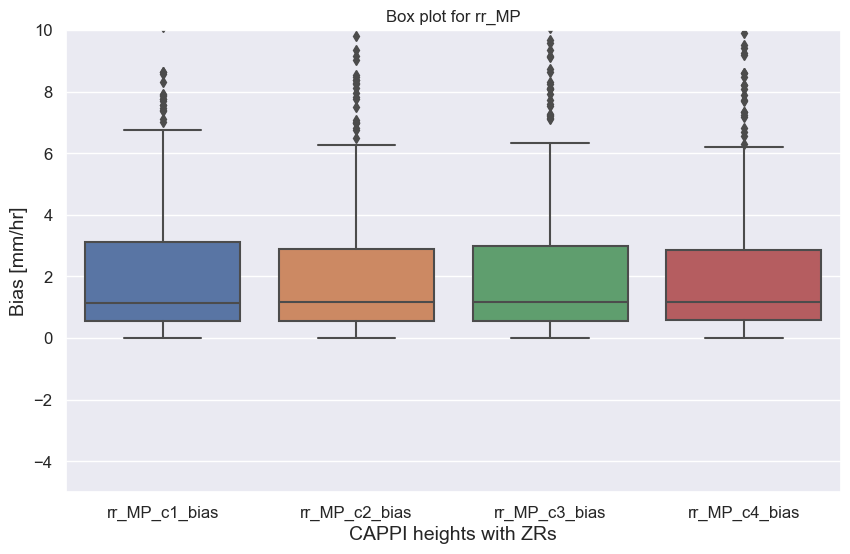

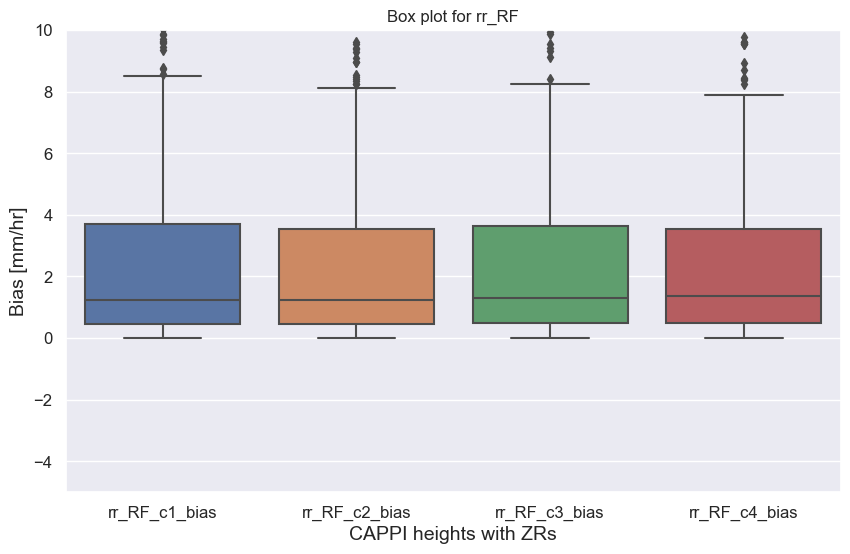

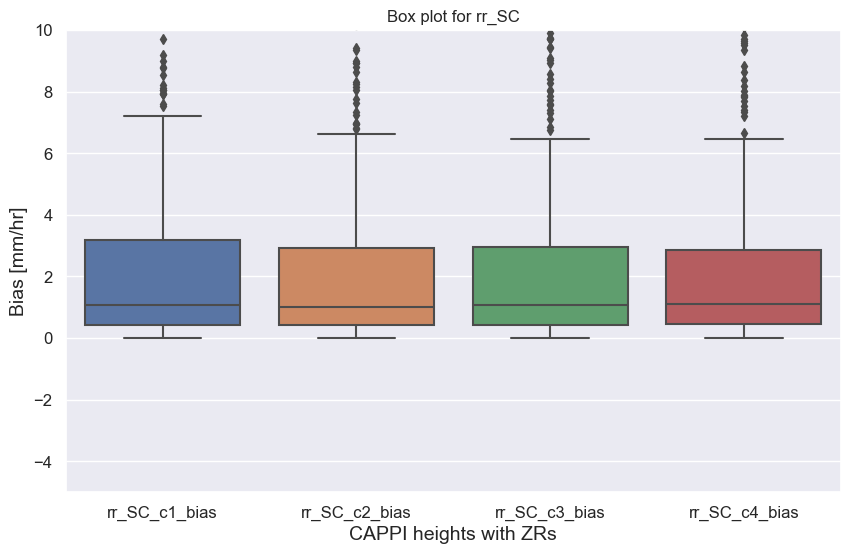

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the columns by their prefixes
groups = {'rr_MP': ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
          'rr_RF': ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
          'rr_SC': ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']}

# Plot box plots for each group
for group, columns in groups.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=mean_bias_df[columns], orient='v')
    plt.title(f'Box plot for {group}')
    plt.xlabel('CAPPI heights with ZRs')
    plt.ylabel('Bias [mm/hr]')
    plt.ylim(-5, 10)  # Set y-axis limits
    plt.show()



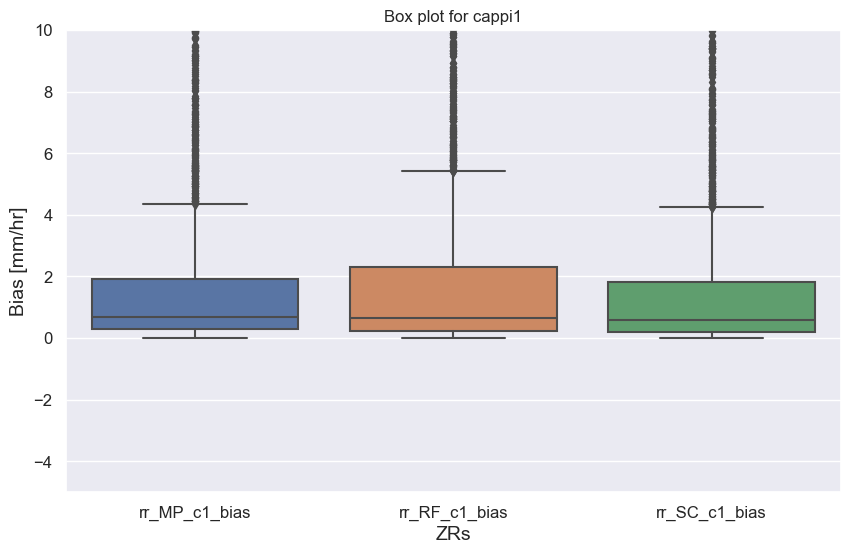

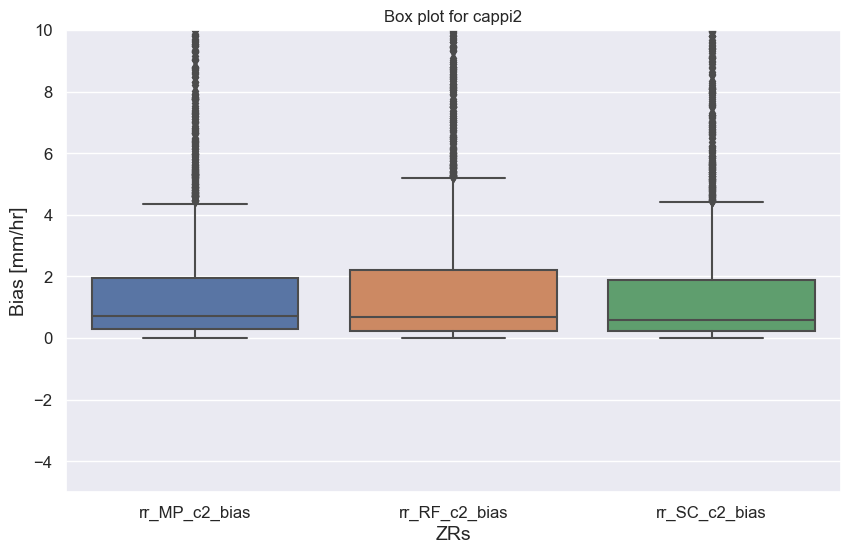

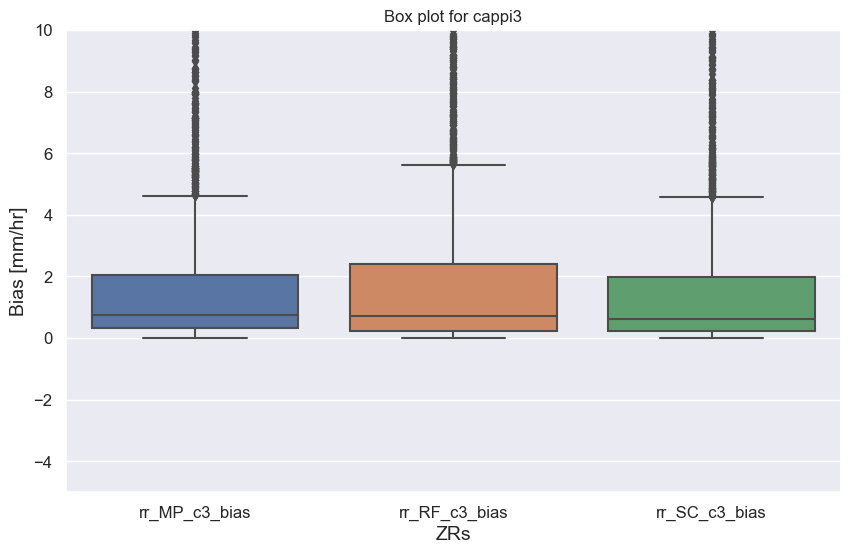

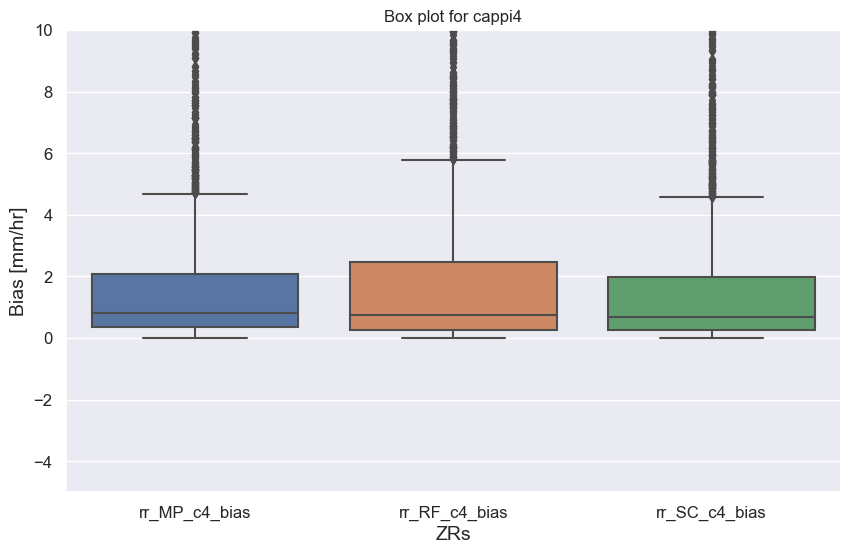

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the columns by their prefixes
groups = {'cappi1': ['rr_MP_c1_bias', 'rr_RF_c1_bias', 'rr_SC_c1_bias'],
          'cappi2': ['rr_MP_c2_bias', 'rr_RF_c2_bias', 'rr_SC_c2_bias'],
          'cappi3': ['rr_MP_c3_bias', 'rr_RF_c3_bias', 'rr_SC_c3_bias'],
          'cappi4': ['rr_MP_c4_bias', 'rr_RF_c4_bias', 'rr_SC_c4_bias']}

# Plot box plots for each group
for group, columns in groups.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=bias_df[columns], orient='v')
    plt.title(f'Box plot for {group}')
    plt.xlabel('ZRs')
    plt.ylabel('Bias [mm/hr]')
    plt.ylim(-5, 10)  # Set y-axis limits
    plt.show()

### plot mean RMSE with ERROR bar with 95% CI

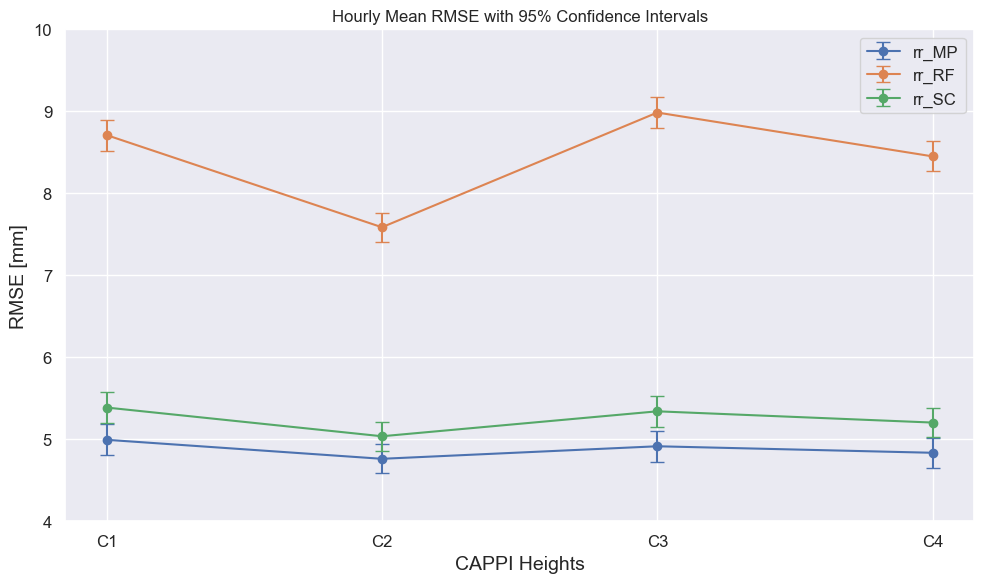

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Function to calculate RMSE and its confidence interval
def calculate_rmse_and_ci(data):
    rmse_values = np.sqrt((data ** 2).mean())  # Calculate RMSE
    confidence_interval = 1.96 * sem(data)  # 95% confidence interval
    return rmse_values, confidence_interval

# Group the columns by their prefixes
groups = {'rr_MP': ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
          'rr_RF': ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
          'rr_SC': ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']}

# Calculate RMSE and confidence intervals for each group
mean_rmse_values = []
ci_values = []
for group, columns in groups.items():
    rmse_values = bias_df[columns]
    mean_rmse, ci = calculate_rmse_and_ci(rmse_values)
    mean_rmse_values.append(mean_rmse)
    ci_values.append(ci)

    
mean_rmse_values_float = np.array(mean_rmse_values)    
column_names = [
    ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
    ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
    ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']
]

# Transform the data into the desired format
mean_rmse_values = []
for i in range(len(mean_rmse_values_float)):
    group_dict = {}
    for j, column_name in enumerate(column_names[i]):
        group_dict[column_name] = mean_rmse_values_float[i][j]
    mean_rmse_values.append(group_dict)


ci_values = np.array(ci_values)


# Group names
groups = ['rr_MP', 'rr_RF', 'rr_SC']

# Plot line graph with error bars
plt.figure(figsize=(10, 6))

# Plot lines for mean RMSE values
for i, group in enumerate(groups):
    mean_values = list(mean_rmse_values[i].values())
    plt.errorbar(range(1, 5), mean_values, yerr=ci, label=group, marker='o', capsize=5)
    #plt.errorbar(range(1, 5), mean_values, yerr=ci_values[i], label=group)

plt.xlabel('CAPPI Heights')
plt.ylabel('RMSE [mm]')
plt.title('Hourly Mean RMSE with 95% Confidence Intervals')
plt.ylim(4,10)
plt.xticks(range(1, 5), ['C1', 'C2', 'C3', 'C4'])  # Assuming x-axis labels are column numbers
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

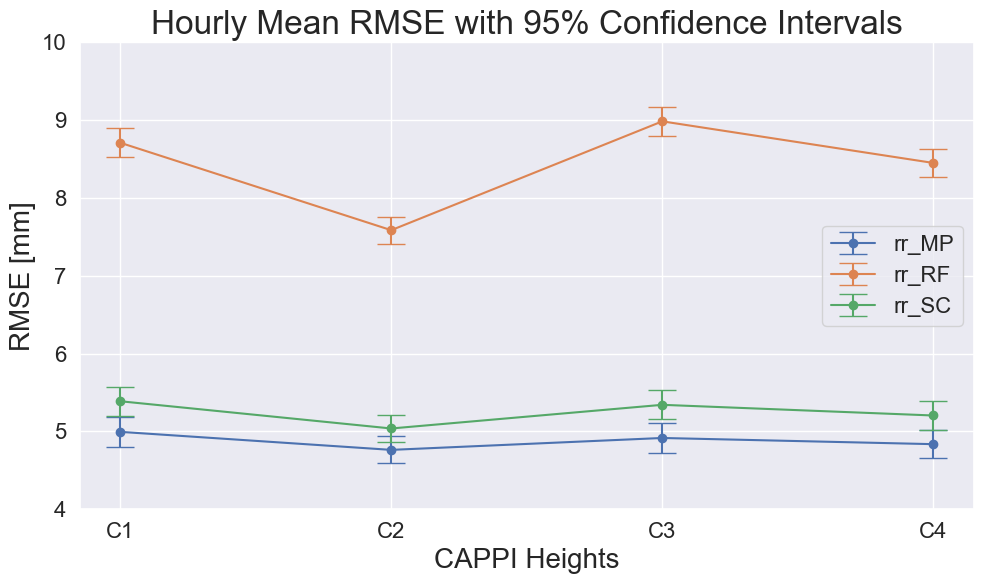

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Function to calculate RMSE and its confidence interval
def calculate_rmse_and_ci(data):
    rmse_values = np.sqrt((data ** 2).mean())  # Calculate RMSE
    confidence_interval = 1.96 * sem(data)  # 95% confidence interval
    return rmse_values, confidence_interval

# Group the columns by their prefixes
groups = {'rr_MP': ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
          'rr_RF': ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
          'rr_SC': ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']}

# Calculate RMSE and confidence intervals for each group
mean_rmse_values = []
ci_values = []
for group, columns in groups.items():
    rmse_values = bias_df[columns]
    mean_rmse, ci = calculate_rmse_and_ci(rmse_values)
    mean_rmse_values.append(mean_rmse)
    ci_values.append(ci)

    
mean_rmse_values_float = np.array(mean_rmse_values)    
column_names = [
    ['rr_MP_c1_bias', 'rr_MP_c2_bias', 'rr_MP_c3_bias', 'rr_MP_c4_bias'],
    ['rr_RF_c1_bias', 'rr_RF_c2_bias', 'rr_RF_c3_bias', 'rr_RF_c4_bias'],
    ['rr_SC_c1_bias', 'rr_SC_c2_bias', 'rr_SC_c3_bias', 'rr_SC_c4_bias']
]

# Transform the data into the desired format
mean_rmse_values = []
for i in range(len(mean_rmse_values_float)):
    group_dict = {}
    for j, column_name in enumerate(column_names[i]):
        group_dict[column_name] = mean_rmse_values_float[i][j]
    mean_rmse_values.append(group_dict)


ci_values = np.array(ci_values)


# Group names
groups = ['rr_MP', 'rr_RF', 'rr_SC']

# Plot line graph with error bars
plt.figure(figsize=(10, 6))

# Plot lines for mean RMSE values
for i, group in enumerate(groups):
    mean_values = list(mean_rmse_values[i].values())
    plt.errorbar(range(1, 5), mean_values, yerr=ci, label=group, marker='o', capsize=10)  # Increased capsize
    #plt.errorbar(range(1, 5), mean_values, yerr=ci_values[i], label=group)

plt.xlabel('CAPPI Heights', fontsize=20)  # Increased fontsize
plt.ylabel('RMSE [mm]', fontsize=20)  # Increased fontsize
plt.title('Hourly Mean RMSE with 95% Confidence Intervals', fontsize=24)  # Increased fontsize
plt.ylim(4,10)
plt.xticks(range(1, 5), ['C1', 'C2', 'C3', 'C4'], fontsize=16)  # Increased fontsize
plt.yticks(fontsize=16)  # Increased fontsize
plt.legend(fontsize=16)  # Increased fontsize
plt.grid(True)
plt.tight_layout()
plt.show()
